In [10]:
import pandas as pd
from pathlib import Path
from sklearn.linear_model import LinearRegression

In [11]:
df = pd.read_csv('output.csv')

print(df.head())

   Unnamed: 0                              title   tag              artist  \
0      245433                          Super gut   pop                Modo   
1      375531                              Waves   pop             Tourist   
2      275123                          Love Inc.   pop         Booka Shade   
3      456739                     Valentines Day  misc          Klaus Nomi   
4      261650  All Creatures of Our God and King   pop  David Crowder Band   

   year  views                                             lyrics  Positive  \
0  1995   2837  Gut, gut, super gut!\nGut, gut, super gut!\nGu...  0.994537   
1  2016   1239  [Verse 1]\nI'll be happy to do make you happy\...  0.993658   
2  2013   2775  Love is when you feel like\nWhen you feel good...  0.993209   
3  2007   1438  Thank you!\nYou're very welcome!\nOh yes I kno...  0.992459   
4  2002   4223  All creatures of our God and King\nLift up you...  0.992129   

   Negative   Neutral  
0  0.001354  0.004109  
1  0.001

In [12]:
sorted_df = df.sort_values(by='Positive', ascending=False)

In [13]:
high_views_df = sorted_df[sorted_df['views'] >= 700000]
high_views_df[(high_views_df['Negative'] > 0.70) & (high_views_df['Positive'] <= 0.30)].sort_values(by='Negative', ascending=False).head(20)

,Unnamed: 0,title,tag,artist,year,views,lyrics,Positive,Negative,Neutral
839131,280581,Riot,rap,XXXTENTACION,2015,1322131,[Intro]\n(Luke White on the beat)\n\n[Verse]\n...,0.028778,0.939290,0.031932
838400,89695,Bad Guy,rap,Eminem,2013,2101460,Part 1: Produced by S1 and M-Phazes\n\n[Verse ...,0.034352,0.935008,0.030640
837074,374992,Amnésie,rap,Damso,2016,981855,"[Paroles de ""Amnésie""]\n\n[Couplet 1]\nMort es...",0.040121,0.920728,0.039151
838827,434343,BLOOD.,rap,Kendrick Lamar,2017,1128496,[Intro: Bēkon]\nIs it wickedness?\nIs it weakn...,0.031334,0.920159,0.048506
835129,89698,So Much Better,rap,Eminem,2013,835877,[Intro]\nYou fuckin' groupie\nPick up the godd...,0.046036,0.913969,0.039994
835710,5358,They Dont Care About Us,pop,Michael Jackson,1995,993938,[Intro]\nAll I want to say is that they don't ...,0.044388,0.906822,0.048791
832235,621806,Au DD,rap,PNL,2019,1270655,"[Paroles de ""Au DD""]\n\n[Couplet 1 : Ademo]\nB...",0.052074,0.898983,0.048943
827050,915,I’m Back,rap,Eminem,2000,851582,[Chorus]\nThat's why they call me Slim Shady (...,0.060073,0.895296,0.044631
826956,465263,Heyecanı Yok,rap,Gazapizm,2017,1031608,[''Heyecanı Yok'' için şarkı sözleri]\n\n[Naka...,0.060200,0.890349,0.049451
821607,391332,STFU,rap,Pink Guy,2016,995790,[Chorus]\nShut the fuck up\nYou're a fucking c...,0.066588,0.890288,0.043124


In [14]:
sentiment_by_year_df = df.groupby('year').agg({"Positive":"mean", "Negative":"mean", "Neutral":"mean"})

<Axes: xlabel='year'>

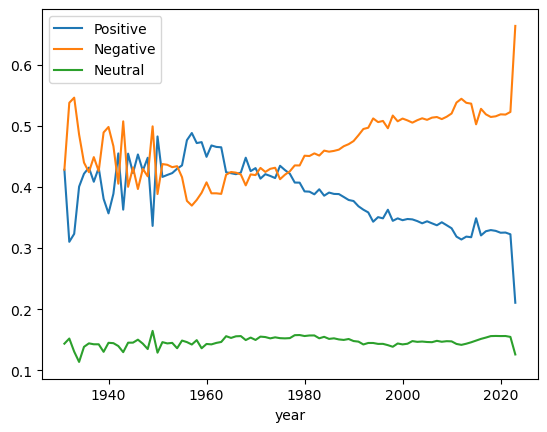

In [15]:
sentiment_by_year_df.loc[sentiment_by_year_df.index > 1930].plot()

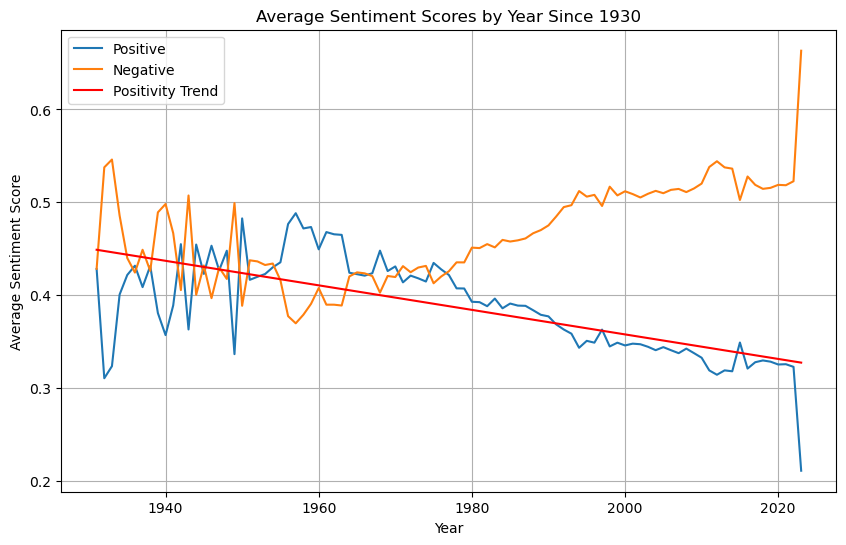

In [21]:
import numpy as np
import matplotlib.pyplot as plt

sentiment_by_year_df = df.groupby('year').agg({"Positive":"mean", "Negative":"mean"})
since_1930 = sentiment_by_year_df.loc[sentiment_by_year_df.index > 1930]

# Plotting the original data
ax = since_1930.plot(figsize=(10, 6), title="Average Sentiment Scores by Year Since 1930")
ax.set_xlabel("Year")
ax.set_ylabel("Average Sentiment Score")

# Preparing data for linear regression
X = since_1930.index.values.reshape(-1, 1)  # Year as the independent variable
Y = since_1930['Positive'].values.reshape(-1, 1)  # Positivity as the dependent variable
# 
# # Creating and fitting the model
model = LinearRegression()
model.fit(X, Y)
# 
# # Coefficients
intercept = model.intercept_[0]
slope = model.coef_[0][0]

intercept, slope

# Adding the trend line for Positivity
years = np.array([since_1930.index.min(), since_1930.index.max()]).reshape(-1, 1)
predicted_positivity = model.predict(years)
ax.plot(years, predicted_positivity, color='red', label='Positivity Trend')

# Adding a legend and grid
ax.legend()
ax.grid(True)

plt.show()

# since_1930.plot()

# sentiment_by_year_df.loc[sentiment_by_year_df.index > 1930].plot()

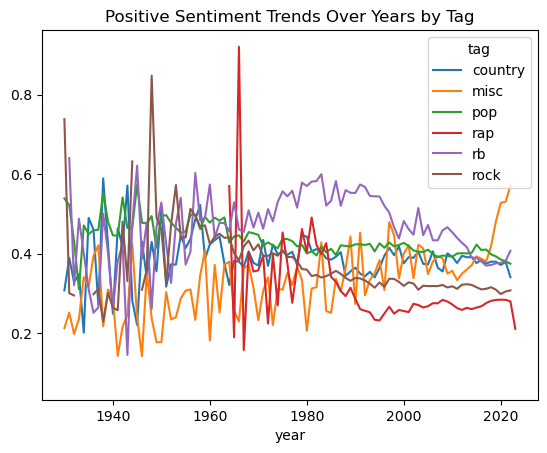

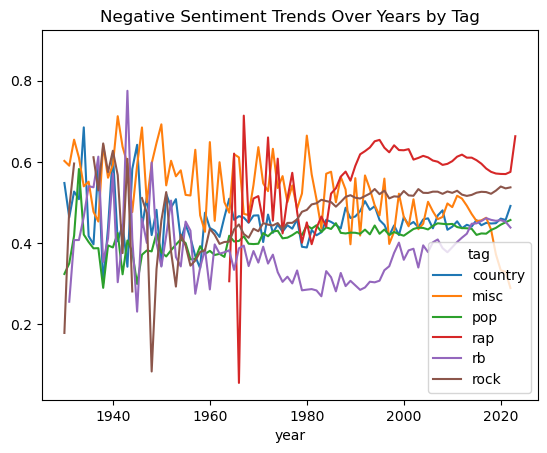

In [40]:
import matplotlib.pyplot as plt

post_1930 = df[df['year'] >= 1930]
sentiment_by_year_tag = post_1930.groupby(['year', 'tag']).agg({"Positive":"mean", "Negative":"mean"}).reset_index()
pivot_positive = sentiment_by_year_tag.pivot(index='year', columns='tag', values='Positive')
pivot_positive.plot(title='Positive Sentiment Trends Over Years by Tag')
pivot_negative = sentiment_by_year_tag.pivot(index='year', columns='tag', values='Negative')
pivot_negative.plot(title='Negative Sentiment Trends Over Years by Tag')
plt.show()

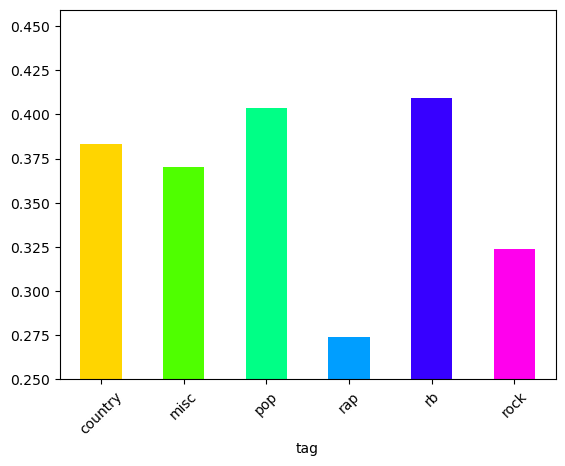

In [39]:
import seaborn as sns

average_scores = df.groupby('tag')['Positive'].mean()
num_unique_tags = len(average_scores)
palette = sns.color_palette("hsv", num_unique_tags)

# Plot with individual colors from the palette
ax = average_scores.plot(kind='bar', rot=45, color=palette)
# Set the y-axis to start at 0.25
ax.set_ylim([0.25, average_scores.max() + 0.05])  # Adding a little buffer above the max value for visual clarity
plt.show()

In [25]:
average_scores = df.groupby('tag')['Negative'].mean()
average_scores

tag
country    0.450752
misc       0.481406
pop        0.433544
rap        0.589347
rb         0.427897
rock       0.517543
Name: Negative, dtype: float64

In [26]:
average_scores = df.groupby('tag')['Neutral'].mean()
average_scores

tag
country    0.166281
misc       0.148227
pop        0.162676
rap        0.136636
rb         0.162762
rock       0.158937
Name: Neutral, dtype: float64

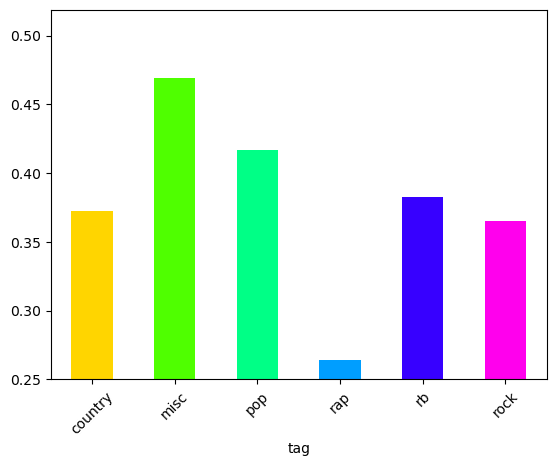

In [44]:
high_views_df = sorted_df[sorted_df['views'] >= 700000]
# high_views_df = high_views_df[(high_views_df['Positive'] > 0.70) & (high_views_df['Negative'] <= 0.30)].sort_values(by='Positive', ascending=False)

import seaborn as sns

average_scores = high_views_df.groupby('tag')['Positive'].mean()
num_unique_tags = len(average_scores)
palette = sns.color_palette("hsv", num_unique_tags)

# Plot with individual colors from the palette
ax = average_scores.plot(kind='bar', rot=45, color=palette)
# Set the y-axis to start at 0.25
ax.set_ylim([0.25, average_scores.max() + 0.05])  # Adding a little buffer above the max value for visual clarity
plt.show()

In [46]:
swear_words = [
'anal',
'anilingus',
'anus',
'apeshit',
'arsehole',
'ass',
'asshole',
'assmunch',
'autoerotic',
'babeland',
'bangbros',
'bareback',
'barenaked',
'bastard',
'bastardo',
'bastinado',
'bbw',
'bdsm',
'beaner',
'beaners',
'bestiality',
'bimbos',
'birdlock',
'bitch',
'bitches',
'blowjob',
'blumpkin',
'bollocks',
'bondage',
'boner',
'boob',
'boobs',
'bukkake',
'bulldyke',
'bullshit',
'bunghole',
'busty',
'butt',
'buttcheeks',
'butthole',
'camgirl',
'camslut',
'camwhore',
'carpetmuncher',
'circlejerk',
'clit',
'clitoris',
'clusterfuck',
'cock',
'cocks',
'coprolagnia',
'coprophilia',
'cornhole',
'coon',
'coons',
'creampie',
'cum',
'cumming',
'cunnilingus',
'cunt',
'darkie',
'daterape',
'deepthroat',
'dendrophilia',
'dick',
'dildo',
'dingleberry',
'dingleberries',
'doggiestyle',
'doggystyle',
'dolcett',
'domination',
'dominatrix',
'dommes',
'dvda',
'ecchi',
'ejaculation',
'erotic',
'erotism',
'escort',
'eunuch',
'faggot',
'fecal',
'felch',
'fellatio',
'feltch',
'femdom',
'figging',
'fingerbang',
'fingering',
'fisting',
'footjob',
'frotting',
'fuck',
'fuckin',
'fucking',
'fucktards',
'fudgepacker',
'futanari',
'genitals',
'goatcx',
'goatse',
'gokkun',
'goodpoop',
'goregasm',
'grope',
'g-spot',
'guro',
'hand job',
'handjob',
'hentai',
'homoerotic',
'honkey',
'hooker',
'humping',
'incest',
'intercourse',
'jailbait',
'jigaboo',
'jiggaboo',
'jiggerboo',
'jizz',
'juggs',
'kike',
'kinbaku',
'kinkster',
'kinky',
'knobbing',
'lolita',
'lovemaking',
'masturbate',
'milf',
'motherfucker',
'muffdiving',
'nambla',
'nawashi',
'negro',
'neonazi',
'nigga',
'nigger',
'nimphomania',
'nipple',
'nipples',
'nude',
'nudity',
'nympho',
'nymphomania',
'octopussy',
'omorashi',
'orgasm',
'orgy',
'paedophile',
'paki',
'panties',
'panty',
'pedobear',
'pedophile',
'pegging',
'penis',
'pissing',
'pisspig',
'playboy',
'ponyplay',
'poof',
'poon',
'poontang',
'punany',
'poopchute',
'porn',
'porno',
'pornography',
'pthc',
'pubes',
'pussy',
'queaf',
'queef',
'quim',
'raghead',
'rape',
'raping',
'rapist',
'rectum',
'rimjob',
'rimming',
'sadism',
'santorum',
'scat',
'schlong',
'scissoring',
'semen',
'sex',
'sexo',
'sexy',
'shemale',
'shibari',
'shit',
'shitblimp',
'shitty',
'shota',
'shrimping',
'skeet',
'slanteye',
'slut',
's&m',
'smut',
'snatch',
'snowballing',
'sodomize',
'sodomy',
'spic',
'splooge',
'spooge',
'spunk',
'strapon',
'strappado',
'suck',
'sucks',
'swastika',
'swinger',
'threesome',
'throating',
'tit',
'tits',
'titties',
'titty',
'topless',
'tosser',
'towelhead',
'tranny',
'tribadism',
'tubgirl',
'tushy',
'twat',
'twink',
'twinkie',
'undressing',
'upskirt',
'urophilia',
'vagina',
'vibrator',
'vorarephilia',
'voyeur',
'vulva',
'wank',
'wetback',
'xx',
'xxx',
'yaoi',
'yiffy',
'zoophilia',
]

In [ ]:
# Function to count swear words in a text
def count_swear_words(text):
    count = 0
    for swear_word in swear_words:
        count += text.lower().split().count(swear_word)
    return count

# Applying the function to each record in the 'lyrics' column
df['num_swear_words'] = df['lyrics'].apply(count_swear_words)